# Micro Mortgages - Logistic Regression
- Author: Oliver Mueller
- Last update: 26.01.2024

## Initialize notebook
Load required packages. Set up workspace, e.g., set theme for plotting and initialize the random number generator.

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
from sklearn.metrics import classification_report

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
plt.style.use('fivethirtyeight')

## Problem description

In India, there are about 20 million home loan (mortgage) aspirants
working in the informal sector:

- Monthly income between INR 20,000-25,000 (\$ 325-400)
- Typically no formal accounts and documents (e.g., tax returns, income proofs, bank statements)
- Often use services of money lenders with interest rates between 30 and 60% per annum

Providing mortgages to this group of customers requires to quickly and
efficiently assess their creditworthiness. Due to a lack of formal
documents and objective data, most financial institutions perform
interview-based processes to decide about these loan requests:

Strength of the current process:

-   Interview-based field assessment

-   Relaxation of document requirements

Weaknesses of the current process:

-   Costly (total transaction costs as high as 30% of loan volume)

-   Subjective judgments; depends on individual skills and motivations

-   Low reliability across branches and credit officers

-   Risk of corruption and fraud

## Load data

Load training data from CSV file.

In [3]:
data = pd.read_csv('data/micromortgage.csv')

In [4]:
data.head()

,ID,Decision,Build_Selfcon,Tier,Accommodation_Class,Loan_Type,Gender,Employment_Type,Doc_Proof_Inc,Marital_Status,...,LoanReq,Term,Dwnpay,BankSave,CalcEmi,IIR,IAR,FOIR,LTV,LVR
0,FBD-E2B0-588300,1,Self Contruction,2,Non_Rented,Home_Loan,Female,Salaried,N,Married,...,780000,180,670000,0,12004.230470,34.999797,45.000114,34.999797,80.000000,54.000000
1,GUJ-A79X-831476,0,Self Contruction,1,Non_Rented,Home_Loan,Female,Self_Employed,N,Married,...,800000,180,470000,0,12312.030270,49.248121,75.533928,49.248121,62.992126,62.992126
2,SHB-947O-759226,1,Self Contruction,3,Rented,Home_Loan,Female,Salaried,N,Married,...,480000,120,120000,300000,8342.290039,41.999144,79.998946,41.999144,78.999992,80.000000
3,SHB-7S3I-679761,1,Self Contruction,3,Non_Rented,Home_Loan,Female,Self_Employed,N,Married,...,300000,180,95000,0,4617.009766,30.999126,84.996498,30.999126,20.000000,76.000000
4,VAD-BPKZ-551476,0,Self Contruction,2,Non_Rented,Home_Loan,Female,Self_Employed,N,Married,...,1000000,180,375000,0,15390.040040,45.000117,57.999020,45.000117,73.000001,73.000000


## Prepare data

In [5]:
data = data.drop(['ID'], axis=1)
data["Tier"] = data["Tier"].apply(lambda x: "T"+str(x))

In [6]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

## Exploratory data analysis

### Descriptive summary statistics

Calculate base rate of mortgage approvals.

In [7]:
train["Decision"].mean()

0.8037848605577689

### Explore relationships between response and predictors.

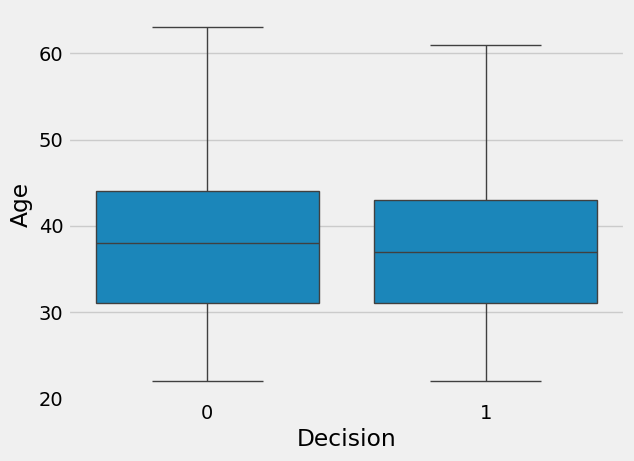

In [8]:
sns.boxplot(data=train, x="Decision", y="Age")
plt.show()

In [9]:
# YOUR CODE HERE

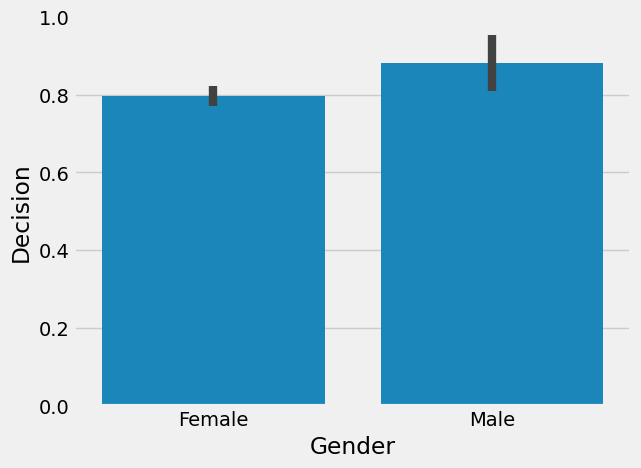

In [10]:
sns.barplot(data=train, x="Gender", y="Decision")
plt.show()

In [11]:
# YOUR CODE HERE

## Logistic Regression

In [12]:
model_logit = smf.logit(formula='Decision ~ Age + Gender', data=train)
model_logit = model_logit.fit()

Optimization terminated successfully.
         Current function value: 0.492919
         Iterations 6


In [13]:
print(model_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               Decision   No. Observations:                 1004
Model:                          Logit   Df Residuals:                     1001
Method:                           MLE   Df Model:                            2
Date:                Thu, 15 Feb 2024   Pseudo R-squ.:                0.004426
Time:                        16:46:34   Log-Likelihood:                -494.89
converged:                       True   LL-Null:                       -497.09
Covariance Type:            nonrobust   LLR p-value:                    0.1108
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6257      0.364      4.472      0.000       0.913       2.338
Gender[T.Male]     0.6528      0.348      1.878      0.060      -0.029       1.334
Age               -0.0069      0.009

In [14]:
pred_proba = model_logit.predict(test)
pred_label = round(pred_proba, 0)

In [15]:
print(classification_report(test["Decision"], pred_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.78      1.00      0.88       197

    accuracy                           0.78       252
   macro avg       0.39      0.50      0.44       252
weighted avg       0.61      0.78      0.69       252



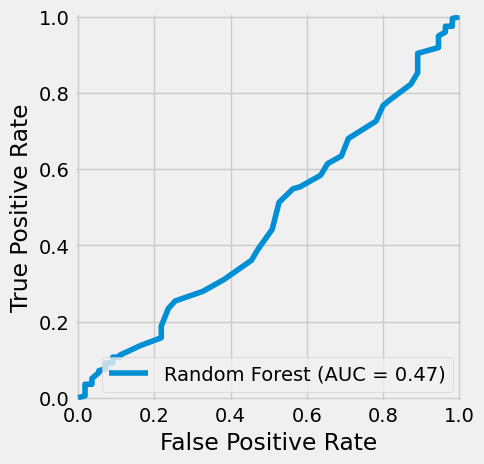

In [16]:
fpr, tpr, thresholds = roc_curve(test["Decision"], pred_proba)
auc_score = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name='Random Forest')
display.plot()
plt.show()